In [2]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
seaborn.boxplot(x=None, y=None, hue=None,
                data=None, order=None, hue_order=None,
                orient=None, color=None, palette=None,
                saturation=0.75, width=0.8, dodge=True,
                fliersize=5, linewidth=None, whis=1.5,
                notch=False, ax=None, **kwargs)
show class data

x,y,hue:
data: DataFrame array or list
order,hue_order: order=[x1,x2,...]
orient: v|h
color:matplotlib color
palette: palette='Set1'  Set2,Set3
saturation: float
dodge:bool  eg:sex male female
size:float
edgecolor:matplotlib color，gray
linewidth:float
'''

In [5]:
path = '../data/'
csv_name_tips = 'tips.csv'
tips = pd.read_csv(path+csv_name_tips)
print(tips.shape)
print(tips.dtypes)
print(tips.info())
print('----------------------')
print(tips.describe(include='all'))

(244, 7)
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
----------------------
        total_bill      tip   sex smoker  day    time     size
count     244.0000 244.0000   244    244  244     244 244.0000
unique         NaN      NaN     2      2    4       2      NaN
top            NaN      NaN  Male     No  Sat  Dinner      NaN
freq   

In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

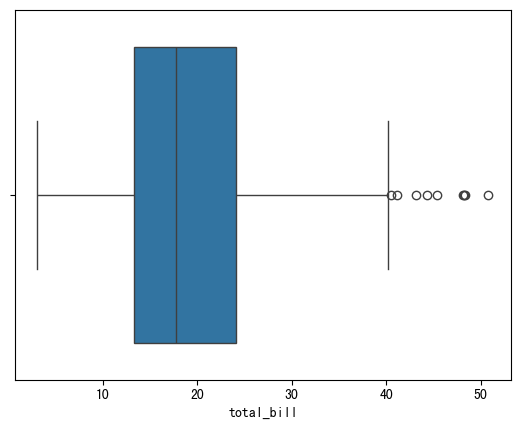

In [7]:
# 1
sns.boxplot(x=tips['total_bill'])
plt.show()

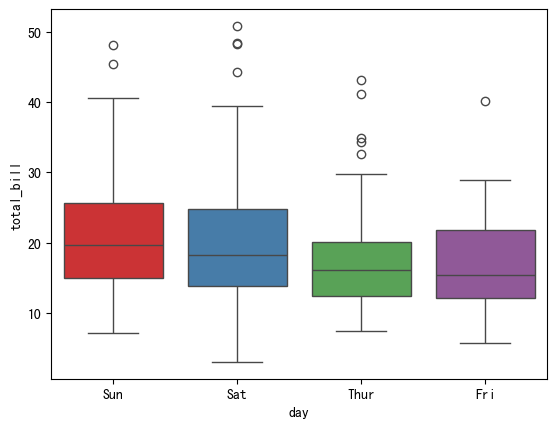

In [11]:
#2 x=x,y=y
plt.close('all')
sns.boxplot(x='day',y='total_bill',data=tips,palette='Set1')
plt.show()

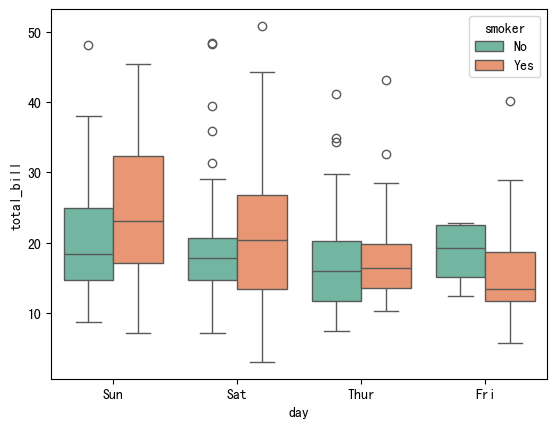

In [13]:
#3 hue='smoker'
plt.close('all')
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='Set2')
plt.show()



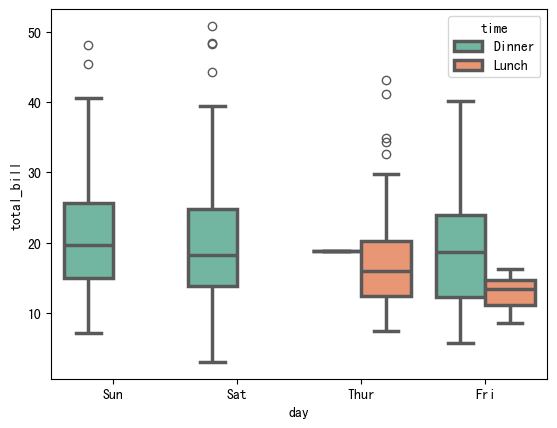

In [15]:
#4 hue='time',linewidth=2.5
plt.close('all')
sns.boxplot(x='day',y='total_bill',hue='time',data=tips,palette='Set2',linewidth=2.5)
plt.show()


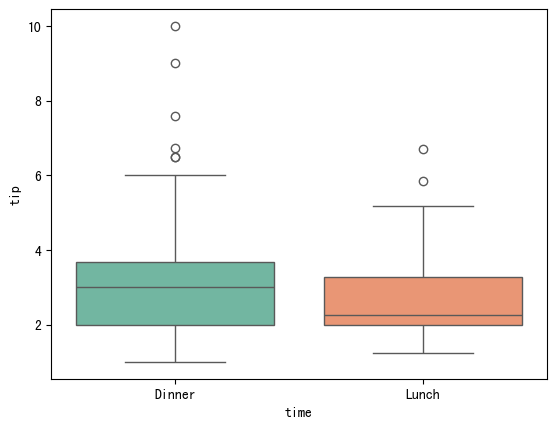

In [16]:
#5 order
plt.close('all')
sns.boxplot(x='time',y='tip',data=tips,order=['Dinner','Lunch'],palette='Set2')
plt.show()


In [22]:
iris = pd.read_csv(path+'iris.csv')
print(iris.shape)
print(iris.dtypes)
print(iris.info())
print(iris.describe(include='all'))
iris.head(2)

(150, 5)
SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
        SepalLength  SepalWidth  PetalLength  PetalWidth         Name
count      150.0000    150.0000     150.0000    150.0000          150
unique          NaN         NaN          NaN         NaN            3
top             NaN         NaN          NaN         NaN  Iris-setosa
freq            NaN         NaN          NaN         NaN           50
mean         5.8433      3.0540       3.7587      1.1987 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,4.9000,3.0000,1.4000,0.2000,Iris-setosa


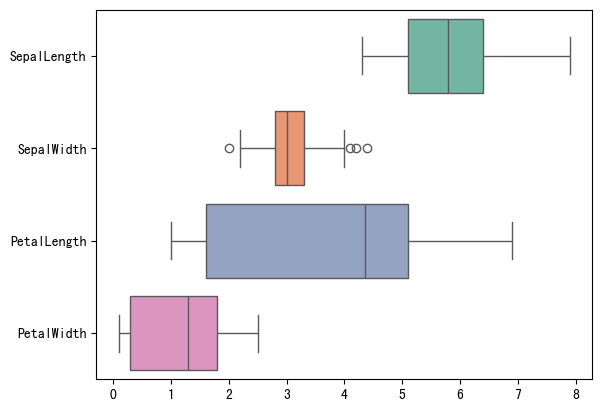

In [23]:
#1.orient='h'
plt.close('all')
sns.boxplot(data=iris,orient='h',palette='Set2')
plt.show()

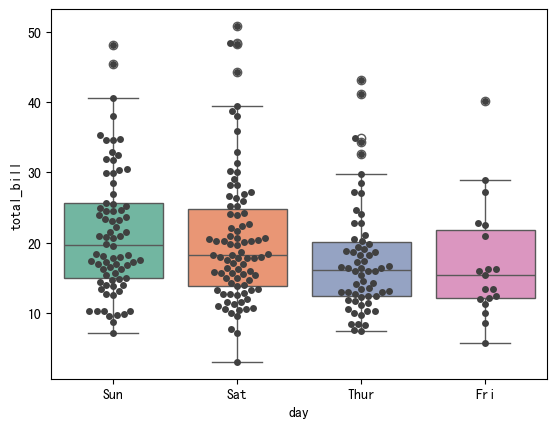

In [25]:
#2 boxplot(), swarmplot()
plt.close('all')
sns.boxplot(x='day',y='total_bill',data=tips,palette='Set2')
sns.swarmplot(x='day',y='total_bill',data=tips,color='.25')
plt.show()

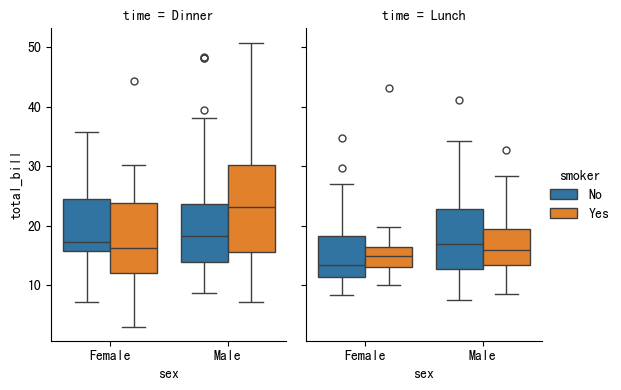

In [27]:
# 8 catplot  boxplot
plt.close('all')
sns.catplot(x='sex',y='total_bill',hue='smoker',col='time',data=tips,kind='box',height=4,aspect=.7)
plt.show()

In [ ]:
'''
seaborn.violinplot(x=None, y=None, hue=None,
                   data=None, order=None, hue_order=None, 
                   bw='scott', cut=2, scale='area', scale_hue=True, 
                   gridsize=100, width=0.8, inner='box', split=False,
                   dodge=True, orient=None, linewidth=None,
                   color=None, palette=None, saturation=0.75,
                   ax=None, **kwargs)
x,y,hue:
data: DataFrame  array or list
bw：{'scott'，'silverman'，float}
cut:float
scale：{“area”，“count”，“width”}
gridsize：int 
inner:{'box'，'quartile'，'point'，'stick'，None}
split : bool
orient: v | h
palette: list or dict 
saturation:float
dodge:bool
'''

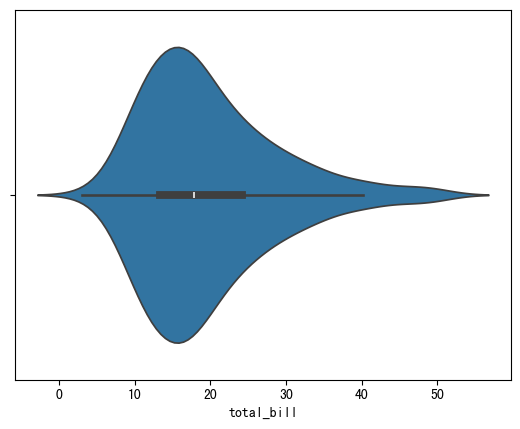

In [28]:
#1.violinplot
plt.close('all')
sns.violinplot(x=tips['total_bill'])
plt.show()

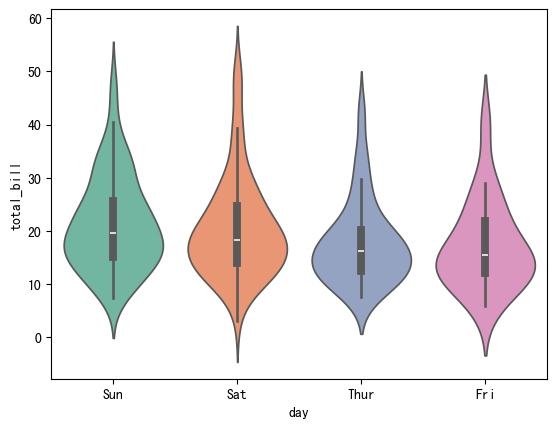

In [30]:
#set x,y
plt.close('all')
sns.violinplot(x='day',y='total_bill',data=tips,palette='Set2')
plt.show()

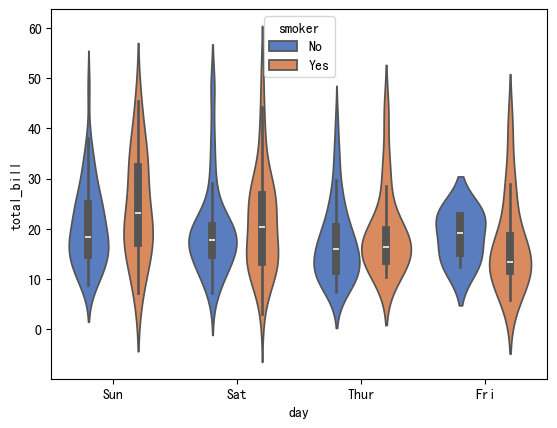

In [31]:
#3 hue='smoker',palette='muted'
plt.close('all')
sns.violinplot(x='day',y='total_bill',hue='smoker',data=tips,palette='muted')
plt.show()


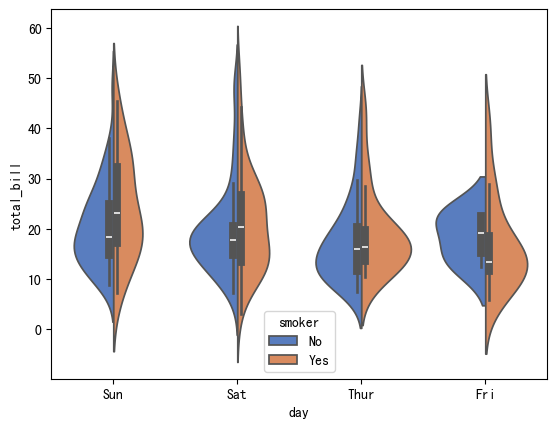

In [32]:
#4 split=True
plt.close('all')
sns.violinplot(x='day',y='total_bill',hue='smoker',data=tips,palette='muted',split=True)
plt.show()


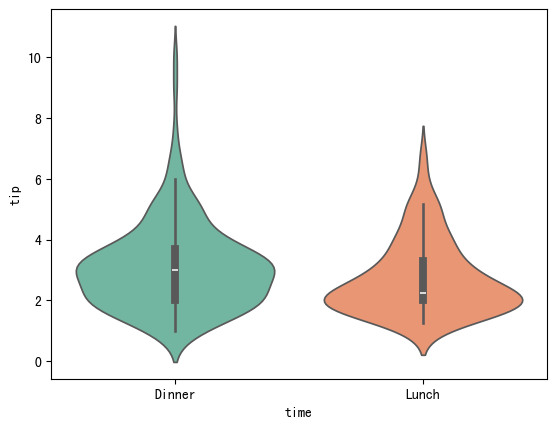

In [33]:
#5 set order
plt.close('all')
sns.violinplot(x='time',y='tip',data=tips,order=['Dinner','Lunch'],palette='Set2')
plt.show()

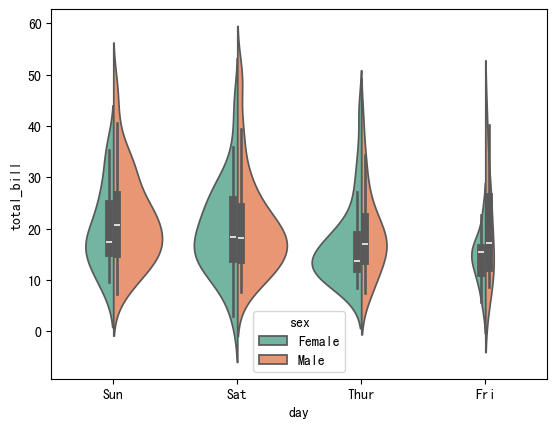

In [34]:
#6 set scale='count'
plt.close('all')
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,palette='Set2',split=True,scale='count')
plt.show()

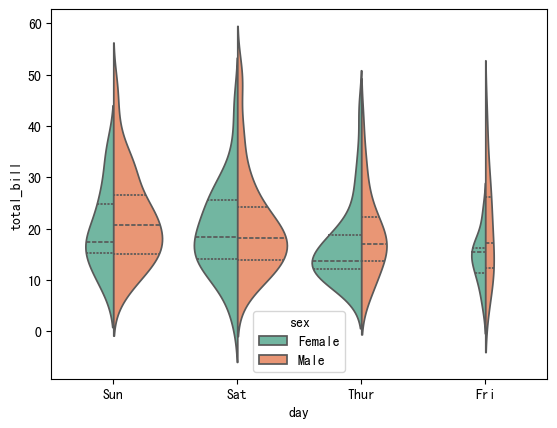

In [35]:
#7 set inner='auartile'
plt.close('all')
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,palette='Set2',split=True,scale='count',inner='quartile')
plt.show()

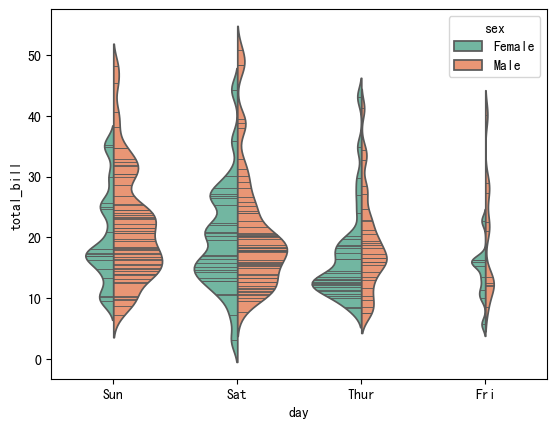

In [36]:
#8 set bw=.2,scale_hue=False
plt.close('all')
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,palette='Set2',split=True,
               scale='count',inner='stick',scale_hue=False,bw=.2)
plt.show()

In [37]:
csv_name_planets = 'planets.csv'
planets = pd.read_csv(path+csv_name_planets)
print(planets.shape)
print(planets.dtypes)
print(planets.info())
print('----------------------')
print(planets.describe(include='all'))

(1035, 6)
method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
----------------------
                 method    number  orbital_period     mass  distance      year
count              1035 1035.0000        992.0000 513.0000  808.0000 1035.0000
unique               10       NaN             NaN      NaN       NaN       NaN
top     Radial Velocity   

In [38]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [39]:
planets.head(2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3000,7.1000,77.4000,2006
1,Radial Velocity,1,874.7740,2.2100,56.9500,2008


In [49]:
# planets.orbital_period.value_counts()

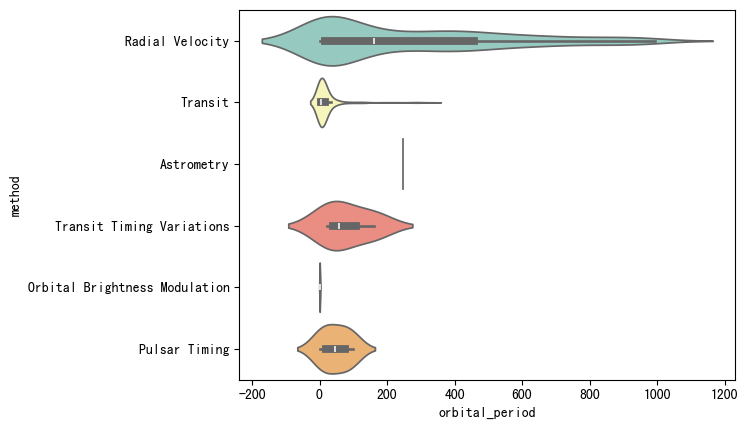

In [47]:
#9
plt.close('all')
sns.violinplot(x="orbital_period", y="method",
               data=planets[planets.orbital_period < 1000],
               scale="width", palette="Set3")
plt.show()

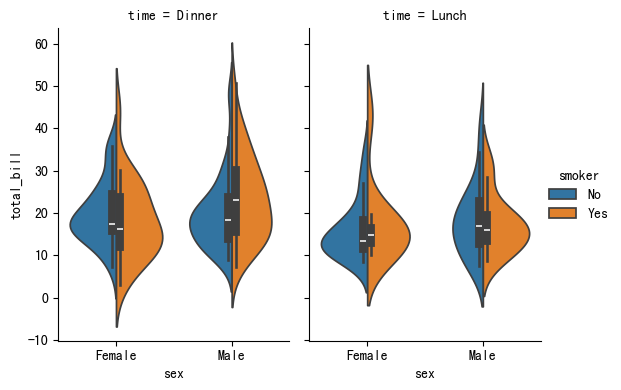

In [50]:
#10  catplot() violinplot()
plt.close('all')
sns.catplot(x='sex',y='total_bill',hue='smoker',col='time',data=tips,kind='violin',split=True,height=4,aspect=.7)
plt.show()